In [53]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
#path to water suppressed and unsuppressed fid signals
PATH_WATER ="../datasets_text/dataset"
#path to metabolite basis
METABOLITES_DIR ="../basis_sets/"

In [55]:
def generate_basis_sets(basis_path):
    generated_basis_sets =np.zeros((2048,22),dtype=complex)
    for i,m in enumerate(os.listdir(basis_path)):
        with open(os.path.join(METABOLITES_DIR,m)) as f:
            j=0
            for line in f.readlines()[22:]:
                line =line.strip()
                if line:
                    data =line.split()
                    m_real,m_imag = data[0],data[1]
                    m_sig =complex(float(m_real),float(m_imag))
                    generated_basis_sets[j,i] =m_sig
                j=j+1
        f.close()
    return np.asarray(generated_basis_sets)

In [56]:
bm = generate_basis_sets(METABOLITES_DIR)
bm.shape

(2048, 22)

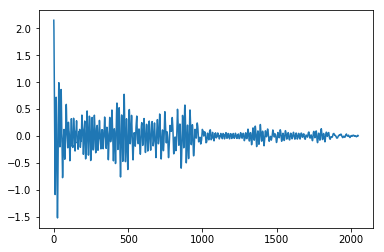

In [57]:
plt.plot(bm[:,6])

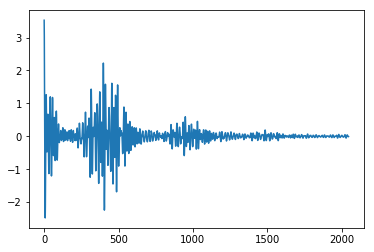

In [58]:
plt.plot(bm[:,2])

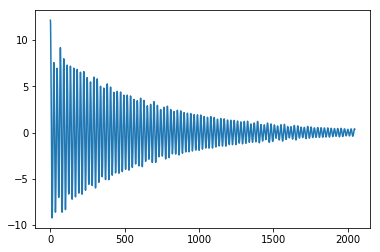

In [59]:
plt.plot(bm[:,5])

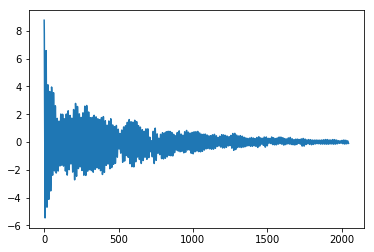

In [60]:
plt.plot(bm[:,21])

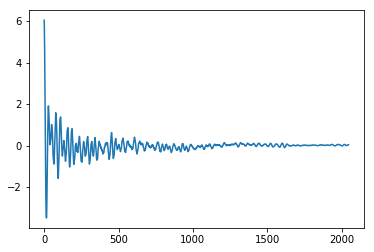

In [61]:
plt.plot(bm[:,20])

In [62]:
#Conversion from time domain to frequency domain
def td_2_fd(samples):
    f_domain = []
    for a in np.arange(samples.shape[1]):
        fft_data =np.fft.fft(samples[:,a])
        f_domain.append(fft_data)
    return np.asarray(f_domain)

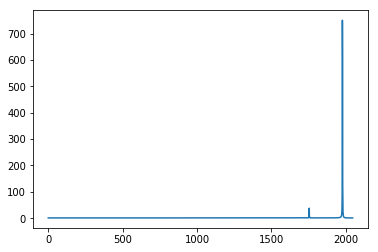

In [63]:
bm_ffts  = td_2_fd(bm)
bm_ffts = bm_ffts.T
plt.plot(bm_ffts[:,0])

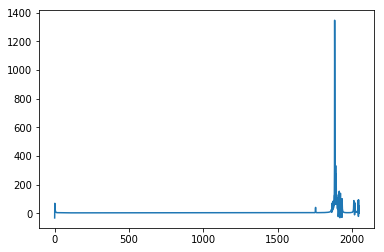

In [64]:
plt.plot(bm_ffts[:,21])

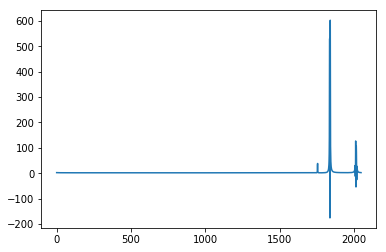

In [65]:
plt.plot(bm_ffts[:,17])

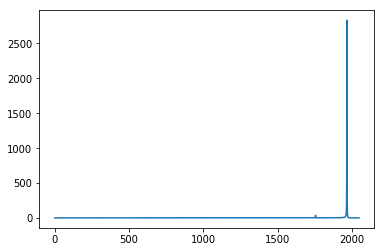

In [66]:
plt.plot(bm_ffts[:,7])

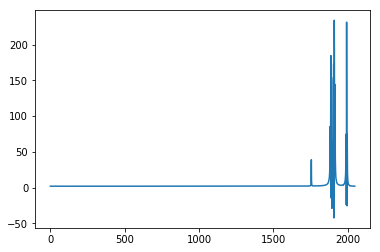

In [67]:
plt.plot(bm_ffts[:,1])

In [68]:
bm.shape

(2048, 22)

In [69]:
def normalize_ffts(ffts):
    for i in np.arange(ffts.shape[1]):
        ffts[:,i] -= ffts[:,i].mean()
        ffts[:,i] /= ffts.std()
    return ffts

In [100]:
normalized_bm = normalize_ffts(bm)
normalized_bm.shape

(2048, 22)

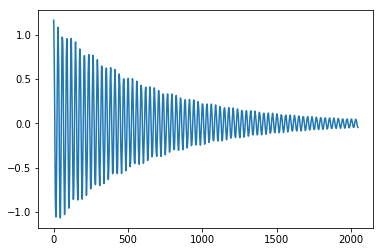

In [91]:
plt.plot(normalized_bm[:,0])

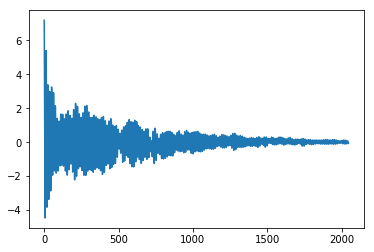

In [92]:
plt.plot(normalized_bm[:,21])

In [101]:
normalized_bm= normalized_bm.T
normalized_bm.shape

(22, 2048)

In [95]:
normalized_bm 

array([[ 2.06648887e+00-3.58235549e-02j,  1.84675941e+00-8.47954061e-01j,
         1.30311623e+00-1.46310502e+00j, ...,
         1.00206121e-02+7.02815257e-03j,  9.16190506e-03+2.11205619e-03j,
         6.16572115e-03-9.94611826e-04j],
       [ 1.97063705e+00-1.26541732e-01j,  1.69159507e+00-9.44589315e-01j,
         1.08667997e+00-1.52930779e+00j, ...,
        -2.60434538e-04-7.09352190e-03j, -2.23868641e-03-7.41323655e-03j,
        -4.78327079e-03-6.96062880e-03j],
       [ 2.85581060e+00+6.57256590e-03j,  2.73625196e+00-7.16363161e-01j,
         2.41160605e+00-1.34966492e+00j, ...,
        -9.41523893e-02+2.28469228e-02j, -9.20666801e-02+4.63166967e-02j,
        -8.36331113e-02+7.00343585e-02j],
       ...,
       [ 2.47366571e+00+2.19280741e-03j,  2.10957461e+00-1.27232961e+00j,
         1.14113137e+00-2.16152925e+00j, ...,
         9.48357726e-02-2.60234353e-02j,  6.63040880e-02-7.11673803e-02j,
         1.86904855e-02-9.45748907e-02j],
       [ 4.10632797e+00+9.51421320e-03j,  3.